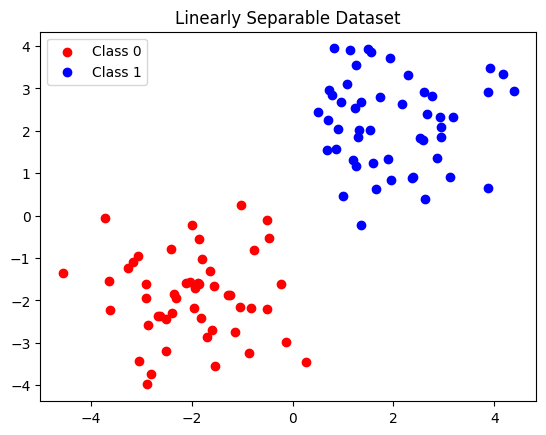

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a linearly separable dataset
# Class 0
np.random.seed(0)
X0 = np.random.randn(50, 2) + np.array([-2, -2])
y0 = np.zeros(50)

# Class 1
X1 = np.random.randn(50, 2) + np.array([2, 2])
y1 = np.ones(50)

# Combine
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Plot dataset
plt.scatter(X0[:,0], X0[:,1], color='red', label='Class 0')
plt.scatter(X1[:,0], X1[:,1], color='blue', label='Class 1')
plt.legend()
plt.title("Linearly Separable Dataset")
plt.show()


In [6]:
class Perceptron:
    def __init__(self, input_dim, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.weights = np.zeros(input_dim)
        self.bias = 0

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(i) for i in linear_output])

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                pred = self.activation(np.dot(xi, self.weights) + self.bias)
                error = target - pred
                self.weights += self.lr * error * xi
                self.bias += self.lr * error


In [7]:
# Initialize and train
perceptron = Perceptron(input_dim=2, lr=0.1, epochs=20)
perceptron.fit(X, y)

# Predict
y_pred = perceptron.predict(X)

# Accuracy
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy*100:.2f}%")


Training Accuracy: 100.00%


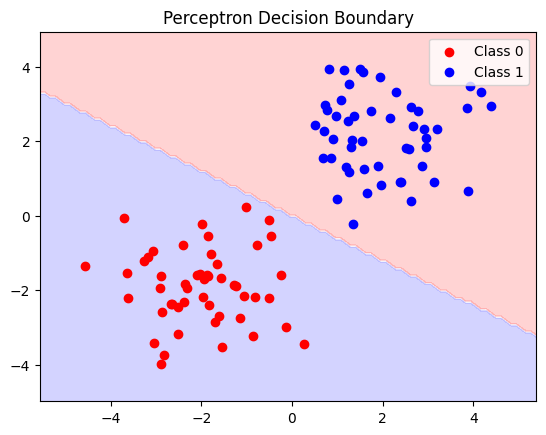

In [8]:
# Plot decision boundary
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.bwr)
plt.scatter(X0[:,0], X0[:,1], color='red', label='Class 0')
plt.scatter(X1[:,0], X1[:,1], color='blue', label='Class 1')
plt.legend()
plt.title("Perceptron Decision Boundary")
plt.show()
